# Google Trends API

In this short notebook, we experiment with the Google Trends API to see what use it might have in our exploration of trends within the TED talks corpus.

**Nota bene**: `pytrends` tends to return pandas dataframes: there is no need to convert results.

In [1]:
import pandas as pd, matplotlib.pyplot as plt                 
from pytrends.request import TrendReq

pytrend = TrendReq()
plt.figure(figsize=(10,6), dpi=300)

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

## General Mills' `pytrends`

I don't know why it tickles me, but it tickles me that our first explorations of Google Trends' API is through a GitHub repo from GeneralMills the cereal company: https://github.com/GeneralMills/pytrends

### Google Trends' Trends/Top Charts

In [2]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head(10)

,0
0,National Best Friends Day
1,NKLA stock
2,National Best Friends Day 2020
3,Boeing stock
4,Hartley Sawyer
5,Hertz stock
6,Kente cloth
7,Adam Rapoport
8,Anthony Bourdain
9,Allen Iverson


In [3]:
# Get Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,


### Search Trends

In [4]:
# Please note that keyword list argument can be a longer list: 
# e.g., , 'corona', 'black lives matter', 'george floyd'
# Here it's just one term for ease of working through the examples.
pytrend.build_payload(kw_list=['COVID'])

# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,COVID
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


In [5]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                    query  value
0               covid 19    100
1            covid cases     12
2            coronavirus      9
3         covid 19 cases      8
4            covid india      7
5   coronavirus covid 19      6
6         covid 19 india      6
7           covid update      5
8             covid news      5
9         covid symptoms      5
10                corona      4
11         covid tracker      4
12             covid map      4
13          covid deaths      4
14      covid 19 tracker      3
15     covid 19 symptoms      3
16           covid world      3
17       covid 19 update      3
18         covid 19 news      3
19          covid 19 map      3
20              covid us      3
21             covid usa      3
22        world covid 19      2
23          covid canada      2
24               covid19      2, 'rising':                    query    value
0               covid 19  5733800
1            covid cases   687550
2            coronavirus   523950


It's not clear why the code below doesn't work. Leaving it for now.

In [6]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrend.related_topics()
reltops = pd.DataFrame.from_dict(related_topic.values())

reltops.head()

,rising,top
0,value formattedValue ...,value formattedValue hasData ...


In [7]:
pytrend.interest_over_time()

,COVID,isPartial
date,,
2015-06-14,0,False
2015-06-21,0,False
2015-06-28,0,False
2015-07-05,0,False
2015-07-12,0,False
...,...,...
2020-05-03,65,False
2020-05-10,65,False
2020-05-17,60,False


In [8]:
df = pytrend.interest_over_time()

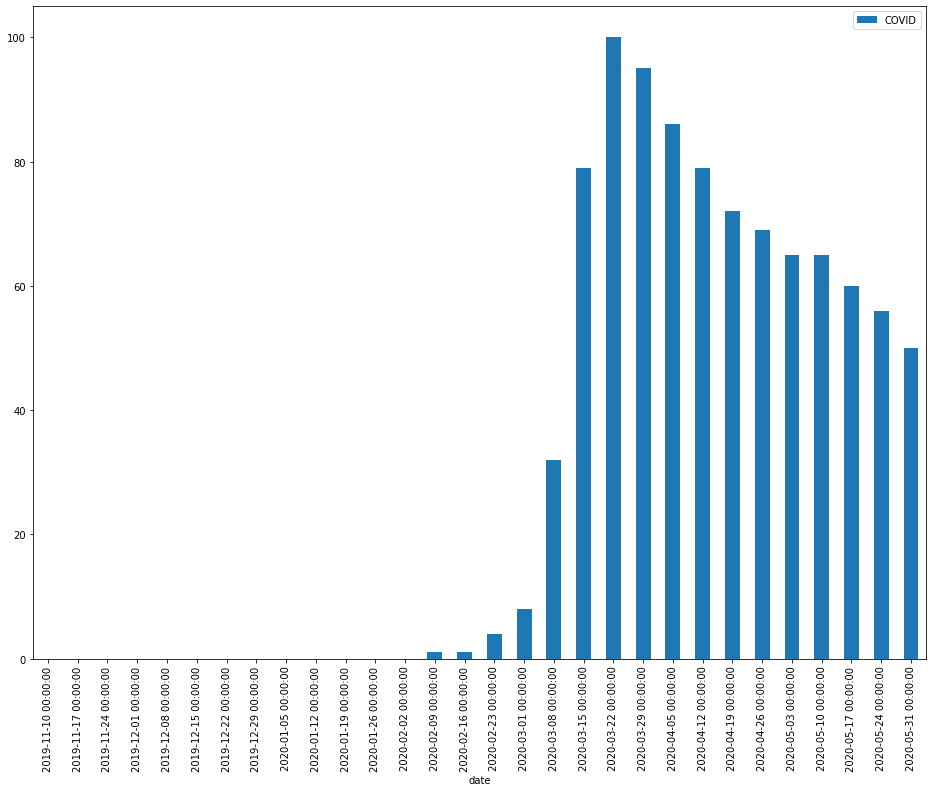

In [18]:
plt = df.tail(30).plot.bar(y='COVID', use_index=True, figsize=(16,12))